In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbs
from tokenizers import Tokenizer

import torch
import torch.nn as nn
import torch.cuda.amp as amp  # AMP 모듈 추가

from torch.utils.data import DataLoader, Dataset
from transformers import BartConfig, BartModel, PreTrainedTokenizerFast
from torch.optim import AdamW
from transformers import BartConfig, BartModel, PreTrainedTokenizerFast
from tqdm import tqdm

import random
import matplotlib.pyplot as plt

import encoder_train_v3

Using device: cuda


Epoch 1/20: 100%|██████████| 3238/3238 [24:00<00:00,  2.25it/s]


Epoch 1/20 - Loss: 0.0036
🔹 Model improved. Saved at trained_encoder3.pth.


Epoch 2/20: 100%|██████████| 3238/3238 [23:15<00:00,  2.32it/s]


Epoch 2/20 - Loss: 0.0000
🔹 Model improved. Saved at trained_encoder3.pth.


Epoch 3/20: 100%|██████████| 3238/3238 [23:15<00:00,  2.32it/s]

Epoch 3/20 - Loss: 0.0000
⚠️ No improvement for 1/3 epochs.



Epoch 4/20: 100%|██████████| 3238/3238 [23:19<00:00,  2.31it/s]

Epoch 4/20 - Loss: 0.0000
⚠️ No improvement for 2/3 epochs.



Epoch 5/20: 100%|██████████| 3238/3238 [23:22<00:00,  2.31it/s]

Epoch 5/20 - Loss: 0.0000
⚠️ No improvement for 3/3 epochs.
⏹ Early Stopping triggered. Training stopped.


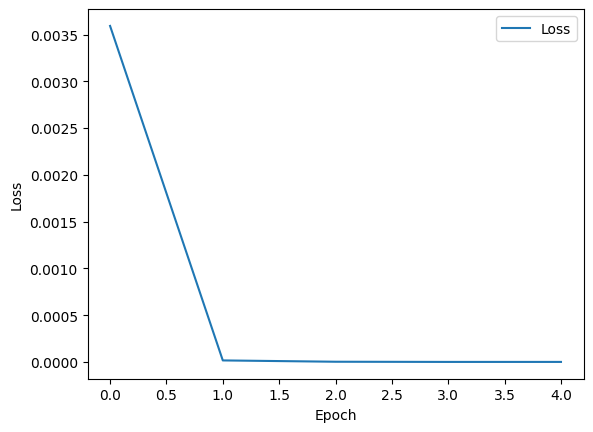

훈련된 모델이 'trained_encoder3.pth'로 저장되었습니다.


In [7]:
train_path = 'datas/encoder_augmentation.csv'
save_path = "trained_encoder3.pth"
tokenizer_path = "tokenizers/BPE_tokenizer_50000_aug.json"
epochs = 20
batch_size = 12
sample_size = -1
d_model=768
encoder_layers=4
encoder_attention_heads=8
patience=3  # Early Stopping 기준 (N 에포크 동안 개선 없으면 종료)
min_delta=0.0001  # 손실 감소 기준

encoder = encoder_train_v3.train(
    train_path=train_path,
    save_path= save_path,
    tokenizer_path=tokenizer_path,
    epochs=epochs,
    batch_size=batch_size,
    sample_size=sample_size,
    d_model=d_model,
    encoder_layers=encoder_layers,
    encoder_attention_heads=encoder_attention_heads,
    patience=patience,
    min_delta=min_delta
)

encoder_layers=4

encoder_attention_heads=4

Using device: cuda
Epoch 1/4: 100%|██████████| 10/10 [00:14<00:00,  1.42s/it]Epoch 1/4 - Loss: 0.1634




encoder_layers=3

encoder_attention_heads=8

Epoch 1/4: 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]Epoch 1/4 - Loss: 0.1806


batch_size = 12

encoder_layers=3

encoder_attention_heads=8

Epoch 1/4: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]Epoch 1/4 - Loss: 0.1953

Epoch 2/4: 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]Epoch 2/4 - Loss: 0.0893

Epoch 3/4:  33%|███▎      | 3/9 [00:05<00:10,  1.72s/it]

In [8]:
encoder.config

AttributeError: 'textEncoder' object has no attribute 'config'

In [4]:



# from transformers import BartModel
# import torch

# # BART 모델 아키텍처 로드 (전체 모델이 아니라 encoder만 사용)
# bart_model = BartModel.from_pretrained("facebook/bart-large")

# # 저장된 가중치 로드
# state_dict = torch.load("trained_encoder3.pth", map_location="cpu")

# # 가중치를 encoder 부분만 로드
# bart_model.encoder.load_state_dict(state_dict, strict=False)  # strict=False 옵션 추가

# # GPU 적용
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# bart_model.encoder.to(device)

# # 평가 모드 설정
# bart_model.encoder.eval()

# print("✅ BART 인코더 가중치 로드 완료!")
